# Sentiment Analysis in a movie review corpus
## 1- First model comparison with raw text
### a) Importing dataset

In [6]:
import pandas as p

#Importing dataset into a Dataframe
corpus_path = 'data/dataset.csv'
label_path = 'data/labels.csv'
label = p.read_table(label_path, header=None, names=['label'])
text = p.read_table(corpus_path, header=None, names=['review'])

##to align label and text
label.reset_index(drop=True, inplace=True)
text.reset_index(drop=True, inplace=True)

#concatenate label and text together aligned

review = p.concat([text.reset_index(drop=True), label.reset_index(drop=True)], axis=1)

In [7]:
type(label)

pandas.core.frame.DataFrame

In [8]:
review.shape

(10000, 2)

In [9]:
review.head(10)

,review,label
0,I ended up watching this whole (very long) mov...,-1
1,Where do I start? Per the title of this film I...,-1
2,This is absolutely the dumbest movie I've ever...,-1
3,Bad Movie - saw it at the TIFF and the movie g...,-1
4,What I found so curious about this film--I saw...,-1
5,The Cat in the Hat is just a slap in the face ...,-1
6,This is going to be the most useless comment I...,-1
7,I loved Adrianne Curry before this show. I tho...,-1
8,"I don't really post comments, but wanted to ma...",-1
9,Would have better strengthened considerably by...,-1


In [10]:
review.tail(10)

,review,label
9990,"What can be said, really... ""The Tenant"" is a ...",1
9991,Wow this was a movie was completely captivatin...,1
9992,"A quite good film version of the novel, though...",1
9993,I saw this movie with my friend and we couldnt...,1
9994,"While the story is sweet, and the dancing and ...",1
9995,"An utterly beautiful film, one of a handful of...",1
9996,Being that this movie has a lot of fine entert...,1
9997,"This was my favourite film as a child, and I h...",1
9998,"Paris, je t'aime (2006) is a film made up of 1...",1
9999,"John Water's (""Pink Flamingos""...) ""Pecker"" is...",1


In [11]:
review.label.value_counts()

-1    5000
 1    5000
Name: label, dtype: int64

In [12]:
FEATURES = review.review
CLASS = review.label 

In [13]:
#creating testing and training set
from sklearn.model_selection import train_test_split
train_feature, test_feature, train_class, test_class = train_test_split(FEATURES, CLASS, random_state=1)
print(train_feature.shape)
print(test_feature.shape)
print(train_class.shape)
print(test_class.shape)


(7500,)
(2500,)
(7500,)
(2500,)


In [14]:
#Vectorizing the text data
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
#create a matrix with terms in each documents
train_feature_m = vect.fit_transform(train_feature)
test_feature_m = vect.transform(test_feature)

### b) Building Naive Bayes model

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

#Mesure time for model training
%time nb.fit(train_feature_m, train_class)


Wall time: 9.53 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
from sklearn import metrics

#Prediction of the class for the test set
pred_class = nb.predict(test_feature_m)

In [17]:
metrics.accuracy_score(test_class, pred_class)

0.8964

In [18]:
metrics.confusion_matrix(test_class, pred_class)

array([[1177,   94],
       [ 165, 1064]], dtype=int64)

In [19]:
false_negative = test_feature[(pred_class < test_class)]
false_positive = test_feature[(pred_class > test_class)]

In [20]:
false_negative.head(10)

6111    This was a great movie with a good cast, all o...
7781    There is a certain genius behind this movie. I...
7775    If you are a fan, then you will probably enjoy...
8074    Besides the fact that my list of favorite movi...
5131    Dream Quest was a surprisingly good movie. The...
9112    I thought this movie would be dumb, but I real...
7782    I remember seeing this movie when I was about ...
7214    For a "no budget" movie this thing rocks. I do...
5482    I was up late flipping cable channels one nigh...
9629    Will all of you please lay the hell off Todd S...
Name: review, dtype: object

In [21]:
test_feature[7781]

'There is a certain genius behind this movie. I was laughing throughout. The scene in the phone sex office, discussing how love heals the doppelganger was a nice attempt at this genius/humor. Execution is poor, but you can see the writer\'s message and they do have some talent. The doppelganger split at the end was like... "ok, wasn\'t quite expecting that but let\'s see what the movie has to say". Certainly ridiculous, but a sweet idea and actually very coherent to the story in a strange way.Is the point of a movie to be logical or is it to be entertaining or communicate on an emotional level? i\'m easily bored by many movies, but this one kept my interest throughout.I think the story may have some auto-biographical roots, but that\'s just a guess. Horribly bad, but good. I\'m looking for other movies this person may have done (with more experience).'

In [22]:
test_feature[6111]

'This was a great movie with a good cast, all of them hitting on all cylinders. And when Dianne Keaton is at her best, well, it just doesn\'t get any better than that. But Tom Everett Scott, always underrated, was even better. He should be a star.My only complaint is with one aspect of the screenplay. None of the characters ever acknowledged that the dead daughter wasn\'t always a good person. And neither was her mother, played by Keaton. At one point she breaks a promise she made to one character not to reveal that he had been sleeping around.One of the other commentators said the movie had a "political agenda". That is a baffling thing to say. There was no politics at all in this movie.'

### c) Building K-Nearest Neighbors model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

#K-nearest neighbors with default parameters take k = 5
knn = KNeighborsClassifier()

%time knn.fit(train_feature_m, train_class)

Wall time: 7.52 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [24]:
pred_class = knn.predict(test_feature_m)

In [25]:
metrics.accuracy_score(test_class, pred_class)

0.7912

In [26]:
#Poor accuracy score for KNN with k=5 so we are trying to test with different values for k (commented long execution time)
from sklearn.neighbors import KNeighborsClassifier

knn_accuracy = {}

for k in range(1, 50) :
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_feature_m, train_class)
    pred_class = knn.predict(test_feature_m)
    knn_accuracy[k] = metrics.accuracy_score(test_class, pred_class)
    
#loading the dictionary into a pandas series
s = p.Series(data=knn_accuracy, index=knn_accuracy.keys())


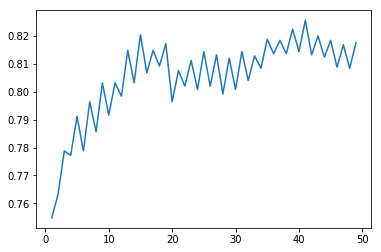

In [27]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

s.plot(kind='line')

In [28]:
#maximum accuracy for k=
s.idxmax()

41

In [29]:
s.max()

0.8256

### d) Building Decision Tree model

In [25]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()

%time dtc.fit(train_feature_m, train_class)

Wall time: 4.59 s


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
pred_class = dtc.predict(test_feature_m)


In [27]:
metrics.accuracy_score(test_class, pred_class)

0.7484

## 2- Model Evaluation on Preprocessed corpora
See : text-processing.ipynb

### a) Importing corpora with different preprocessing

In [28]:
import pandas as p
#Importing dataset into a Dataframe
label = p.read_table('data/labels.csv', header=None, names=['label'])
stopword = p.read_table('data/stopwords.csv', header=None, names=['review'])
lemmatized = p.read_table('data/lemmatized.csv', header=None, names=['review'])
postagged = p.read_table('data/postagged.csv', header=None, names=['review'])



##to align label and text
label.reset_index(drop=True, inplace=True)
stopword.reset_index(drop=True, inplace=True)
lemmatized.reset_index(drop=True, inplace=True)
postagged.reset_index(drop=True, inplace=True)

#concatenate label and text together aligned in a Dataframe & extract features en class separatly
stop_corpus = p.concat([stopword.reset_index(drop=True), label.reset_index(drop=True)], axis=1)
STOP_FEATURES = stop_corpus.review
STOP_CLASS = stop_corpus.label 
lemma_corpus = p.concat([lemmatized.reset_index(drop=True), label.reset_index(drop=True)], axis=1)
LEMMA_FEATURES = lemma_corpus.review
LEMMA_CLASS = lemma_corpus.label 
pos_corpus = p.concat([postagged.reset_index(drop=True), label.reset_index(drop=True)], axis=1)
POS_FEATURES = pos_corpus.review
POS_CLASS = pos_corpus.label 


### b) Creating different pipelines for model evaluation

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

#Using pipeline to fit the vectorization on each "train fold" only and not on the fold used for testing
naive_bayes = Pipeline([('vect', TfidfVectorizer()), ('nb', MultinomialNB())])
knn = Pipeline([('vect', TfidfVectorizer()), ('knn', KNeighborsClassifier(n_neighbors=41))])
decision_tree = Pipeline([('vect', TfidfVectorizer()), ('dtc', DecisionTreeClassifier())])
svm = Pipeline([('vect', TfidfVectorizer()), ('svc', SVC(kernel='linear', C=1))])
sgd = Pipeline([('vect', TfidfVectorizer()), ('sgd', SGDClassifier(max_iter=100))])


### c) Running K-fold crossvalidation on the pipelines

#### - Naive Bayes evaluation

In [30]:
#Running 10-fold crossvalidation with the brut text corpus
cross_val_score(naive_bayes, STOP_FEATURES, STOP_CLASS, cv=10).mean()

0.898

In [31]:
#On the lemmatized corpus
cross_val_score(naive_bayes, LEMMA_FEATURES, LEMMA_CLASS, cv=10).mean()

0.8975000000000002

In [32]:
#On the lemmatized and postagged corpus
cross_val_score(naive_bayes, POS_FEATURES, POS_CLASS, cv=10).mean()

0.8916000000000001

#### - K-nearest neighbors evaluation

In [33]:
#On the brut text corpus
cross_val_score(knn, STOP_FEATURES, STOP_CLASS, cv=10).mean()

0.8465

In [34]:
#On the lemmatized corpus
cross_val_score(knn, LEMMA_FEATURES, LEMMA_CLASS, cv=10).mean()

0.8360999999999998

In [35]:
#On the lemmatized and postagged corpus
cross_val_score(knn, POS_FEATURES, POS_CLASS, cv=10).mean()

0.8347999999999999

#### - Decision tree classifier evaluation

In [36]:
#On the brut text corpus
cross_val_score(decision_tree, STOP_FEATURES, STOP_CLASS, cv=10).mean()

0.7619

In [37]:
#On the lemmatized corpus
cross_val_score(decision_tree, LEMMA_FEATURES, LEMMA_CLASS, cv=10).mean()

0.7636000000000001

In [38]:
#On the lemmatized and postagged corpus
cross_val_score(decision_tree, POS_FEATURES, POS_CLASS, cv=10).mean()

0.7583

#### - Support vector machine evaluation

In [39]:
#On the brut text corpus
cross_val_score(svm, STOP_FEATURES, STOP_CLASS, cv=10,n_jobs=-1).mean()

0.9205

In [40]:
#On the lemmatized corpus
cross_val_score(svm, LEMMA_FEATURES, LEMMA_CLASS, cv=10).mean()

0.9192

In [41]:
#On the lemmatized and postagged corpus
cross_val_score(svm, POS_FEATURES, POS_CLASS, cv=10).mean()

0.9139999999999999

In [42]:
ngram_svm = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,2))), ('svc', SVC(kernel='linear', C=1))])

%time cross_val_score(ngram_svm, STOP_FEATURES, STOP_CLASS, cv=10,n_jobs=-1).mean()

Wall time: 6min


0.9259000000000001

In [43]:
%time cross_val_score(ngram_svm, FEATURES, CLASS, cv=10,n_jobs=-1).mean()

Wall time: 8min 35s


0.9277000000000001

#### - Stochastic gradiant descent evaluation

In [44]:
#On the brut text corpus
cross_val_score(sgd, STOP_FEATURES, STOP_CLASS, cv=10,n_jobs=-1).mean()

0.9198999999999999

In [45]:
#On the lemmatized corpus
cross_val_score(sgd, LEMMA_FEATURES, LEMMA_CLASS, cv=10,n_jobs=-1).mean()

0.9192000000000002

In [46]:
#On the lemmatized and postagged corpus
cross_val_score(sgd, POS_FEATURES, POS_CLASS, cv=10,n_jobs=-1).mean()

0.9137000000000001

### d) Parameter tuning for the best models

#### - Support Vector Machine

In [51]:
from sklearn.model_selection import GridSearchCV

#,'svc__kernel': ['linear', 'rbf'], 'svc__C':[1, 10]}

parameters = {'vect__ngram_range':((1,1),(1, 2))}

svm = Pipeline([('vect', TfidfVectorizer()), ('svc', SVC())])

grid = GridSearchCV(svm, parameters, cv=10, scoring='accuracy',n_jobs=-1)
grid.fit(STOP_FEATURES, STOP_CLASS)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'vect__ngram_range': ((1, 1), (1, 2))},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
grid.cv_results_

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

{'mean_fit_time': array([117.45812931, 171.12647622]),
 'mean_score_time': array([11.50697193, 14.2025346 ]),
 'mean_test_score': array([0.6764, 0.7386]),
 'mean_train_score': array([0.68071111, 0.69544444]),
 'param_vect__ngram_range': masked_array(data=[(1, 1), (1, 2)],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'vect__ngram_range': (1, 1)}, {'vect__ngram_range': (1, 2)}],
 'rank_test_score': array([2, 1]),
 'split0_test_score': array([0.686, 0.796]),
 'split0_train_score': array([0.67777778, 0.785     ]),
 'split1_test_score': array([0.692, 0.754]),
 'split1_train_score': array([0.68188889, 0.70266667]),
 'split2_test_score': array([0.676, 0.687]),
 'split2_train_score': array([0.68822222, 0.64211111]),
 'split3_test_score': array([0.704, 0.739]),
 'split3_train_score': array([0.68411111, 0.64966667]),
 'split4_test_score': array([0.642, 0.677]),
 'split4_train_score': array([0.67933333, 0.65555556]),
 'split5_test_score': arr

In [48]:
from sklearn.model_selection import GridSearchCV

#,'svc__kernel': ['linear', 'rbf'], 'svc__C':[1, 10]}

parameters = {'svc__kernel': ['linear', 'rbf'], 'svc__C':[1, 10]}

svm = Pipeline([('vect', TfidfVectorizer()), ('svc', SVC())])

grid = GridSearchCV(svm, parameters, cv=10, scoring='accuracy',n_jobs=-1)
grid.fit(STOP_FEATURES, STOP_CLASS)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svc__kernel': ['linear', 'rbf'], 'svc__C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [49]:
grid.cv_results_

E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
E:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acces

{'mean_fit_time': array([ 56.14385962,  96.56347032,  45.88044491, 105.83062532]),
 'mean_score_time': array([ 5.9133364 ,  9.77280705,  4.78523433, 11.95111091]),
 'mean_test_score': array([0.9205, 0.6764, 0.9123, 0.6764]),
 'mean_train_score': array([0.98712222, 0.68071111, 1.        , 0.68071111]),
 'param_svc__C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_svc__kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__C': 1, 'svc__kernel': 'linear'},
  {'svc__C': 1, 'svc__kernel': 'rbf'},
  {'svc__C': 10, 'svc__kernel': 'linear'},
  {'svc__C': 10, 'svc__kernel': 'rbf'}],
 'rank_test_score': array([1, 3, 2, 3]),
 'split0_test_score': array([0.915, 0.686, 0.915, 0.686]),
 'split0_train_score': array([0.98722222, 0.67777778, 1.        , 0.67777778]),
 'split1_test